In [8]:
from model import atp_graph, losses
from data_wrangler import synthetic_data_gen, feature_extractor
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from model import atp_pipeline
from comparison_models.gru.gru import gru_model
from comparison_models.gru import gru_pipeline
from data_wrangler import dataset_preparer
from Tutorials.helper import batcher
import os

In [9]:
   
    n_C = 10
    n_T = 10

    batch_size = 1
    test_batch_s = 100

    nll_list = []
    mse_list = []

In [10]:
save_dir = 'weights/forecasting/weather/gru/'

In [11]:
dataset = 'weather'

In [12]:
x_train, y_train, x_val, y_val, x_test, y_test = dataset_preparer.weather_processor(path_to_weather_data="datasets/weather.csv") 


In [14]:
exchange = pd.read_csv('datasets/exchange.csv')

In [19]:
import matplotlib.pyplot as plt

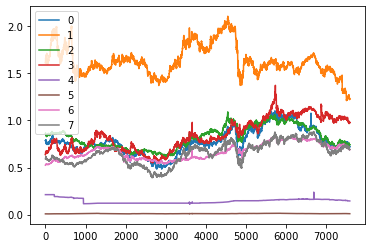

In [22]:
for i in range(exchange.shape[1]-1):
    plt.plot(exchange.iloc[:, i+1], label = i)
    plt.legend()

In [6]:
with tf.device("/CPU:0"):

    for i in range(10):

        step = 1
        run= 67 + i
        tf.random.set_seed(run)

        model = gru_pipeline.instantiate_gru(dataset)
        tr_step = atp_graph.build_graph()

        ###### can we put the name of the model into the folder name #########?

        name_comp = 'run_' + str(run)
        folder = save_dir + '/ckpt/check_' + name_comp
        if not os.path.exists(folder): os.mkdir(folder)
        opt = tf.keras.optimizers.Adam(3e-4)
        ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=opt, net=model)
        manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
        ckpt.restore(manager.latest_checkpoint) 
        sum_mse_tot = 0; sum_nll_tot = 0
        mini = 50000

        
        for i in range(10):
            idx_list = list(range(x_train.shape[0] - (n_C+n_T)))
            x,y,_ = batcher(x_train,y_train,idx_list,window=n_C+n_T) ####### generalise for not just forecasting
            _,_, _, _ = tr_step(model, opt, x, y, n_C, n_T, training=True)

#             if i % 100 == 0:
#                 idx_list = list(range(x_val.shape[0] - (n_C+n_T)))
#                 t_te,y_te,_ = batcher(x_val, y_val, idx_list, batch_s = 100, window=n_C+n_T)
#                 μ, log_σ = model([t_te, y_te, n_C, n_T, False])
#                 _,_,_, nll_pp_te, msex_te = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)

#                 if nll_pp_te < mini:
#                     mini = nll_pp_te
#                     manager.save()
#                     step += 1
#                     ckpt.step.assign_add(1)

#         ckpt = tf.train.Checkpoint(step=tf.Variable(step), optimizer=opt, net=model)
#         manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=1)
#         ckpt.restore(manager.latest_checkpoint) 
   
        
#         idx_list = list(range(x_test.shape[0] - (n_C+n_T)))
#         num_batches = len(idx_list)//test_batch_s

#         for _ in range(num_batches): #### specify correct number of batches for the batcher #####
#             if(_ == (num_batches-1)): test_batch_s = len(idx_list)        
#             t_te,y_te,idx_list = batcher(x_test, y_test, idx_list,batch_s = test_batch_s, window=n_C+n_T)
#             μ, log_σ = model([t_te, y_te, n_C, n_T, False])
#             _, sum_mse, sum_nll, _, _ = losses.nll(y_te[:, n_C:n_C+n_T], μ, log_σ)
#             sum_nll_tot += sum_nll / n_T
#             sum_mse_tot += sum_mse / n_T

#         nllx =  sum_nll_tot / (test_batch_s * x_test.shape[0]//test_batch_s)
#         msex =  sum_mse_tot / (test_batch_s * x_test.shape[0]//test_batch_s)


#         nll_list.append(nllx.numpy())
#         mse_list.append(msex.numpy())
                
            
#         np.save(save_dir + '/nll_list.npy', nll_list)    
#         np.save(save_dir + '/mse_list.npy', mse_list)  



2023-05-09 17:54:19.737686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-09 17:54:19.737957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


2023-05-09 17:54:21.224430: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


KeyboardInterrupt: 

In [7]:
model.summary()

Model: "gru_pipeline_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_wrapper_2 (feature_  multiple                 0 (unused)
 wrapper)                                                        
                                                                 
 gru_model_2 (gru_model)     multiple                  97026     
                                                                 
Total params: 97,026
Trainable params: 97,026
Non-trainable params: 0
_________________________________________________________________
